In [1]:
import pandas as pd 

In [2]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
penguins = pd.read_csv('penguins.csv')
sample = penguins.sample(10)
sample

--2023-06-09 17:30:55--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]   6.92K  --.-KB/s    in 0s      

2023-06-09 17:30:55 (104 MB/s) - ‘penguins.csv’ saved [7086/7086]



,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
147,36.6,18.4,184.0,3475.0,0
296,42.4,17.3,181.0,3600.0,2
236,44.9,13.8,212.0,4750.0,1
330,42.5,17.3,187.0,3350.0,2
245,49.5,16.1,224.0,5650.0,1
287,51.7,20.3,194.0,3775.0,2
160,43.3,13.4,209.0,4400.0,1
70,33.5,19.0,190.0,3600.0,0
129,44.1,18.0,210.0,4000.0,0
317,46.2,17.5,187.0,3650.0,2


In [3]:
#counting null values in each column
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [4]:
#tracing out rows which have null values
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [5]:
#since only two rows contain NAN therefore droping those rows wont effect the data
penguins=penguins.dropna()
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']

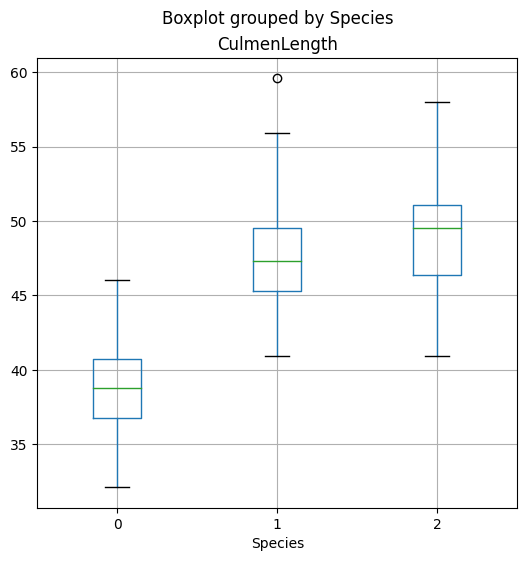

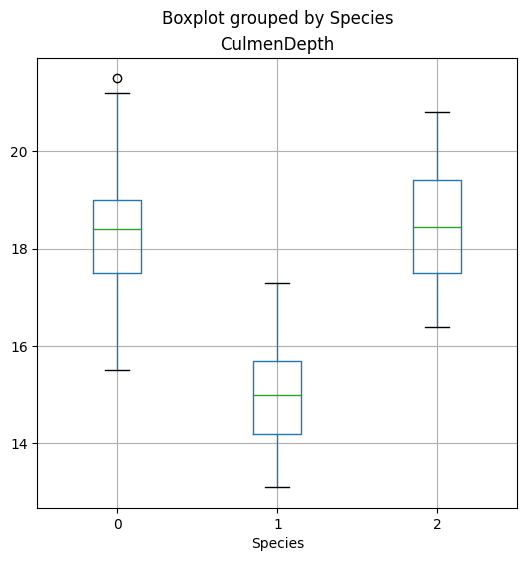

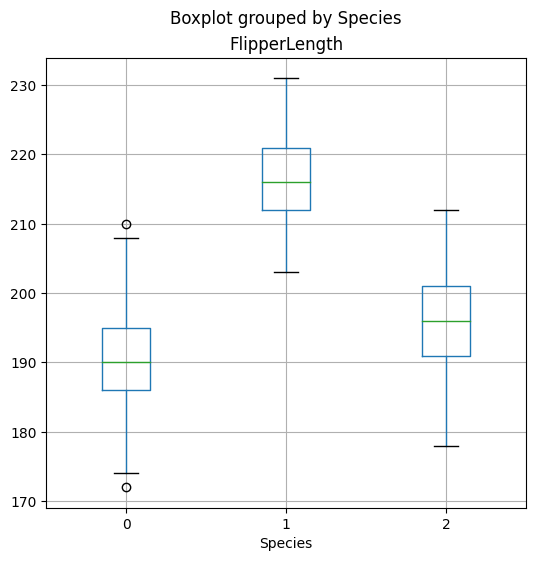

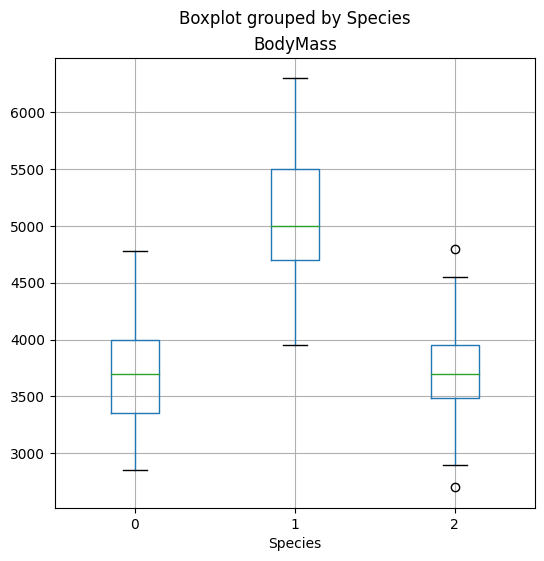

In [10]:
import matplotlib.pyplot as plt
penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
for col in penguin_features:
    penguins.boxplot(column=col, by='Species', figsize=(6,6))
    plt.title(col)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X,y= penguins[penguin_features].values, penguins['Species'].values
X_train,X_test,y_train,y_test=train_test_split(X, y,
                                                                                    test_size=0.30,
                                                                                    random_state=42,
                                                                                    stratify=y)


In [12]:
from sklearn.linear_model import LogisticRegression
reg=0.1
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [13]:
penguin_predictions = multi_model.predict(X_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_test[:15])

Predicted labels:  [0 1 0 1 1 1 1 1 0 0 1 0 1 0 1]
Actual labels   :  [0 1 0 1 1 1 1 1 0 0 1 0 1 0 1]


In [15]:
from sklearn. metrics import classification_report

print(classification_report(y_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      1.00      1.00        37
           2       1.00      0.95      0.98        21

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103



macro avg(f1 score col)=0.99+1.00+0.98/3=0.99

weighted avg(f1 score col )=0.99*[0.45(score of that class)]+1.00*(0.37)+0.98*(0.21)/3=0.99

accuracy(micro avg)=ttp/ttp+0.5*(tfp+tfn)=0.99

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, penguin_predictions))
print("Overall Precision:",precision_score(y_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.9902912621359223
Overall Precision: 0.9927536231884058
Overall Recall: 0.9841269841269842


In [18]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, penguin_predictions)
print(mcm)

[[45  0  0]
 [ 0 37  0]
 [ 1  0 20]]


the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.


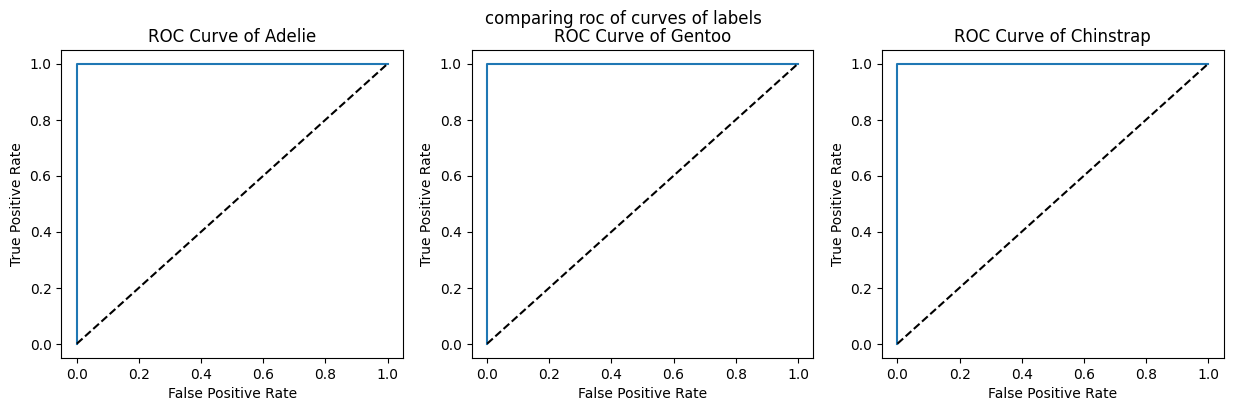

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
# Get class probability scores
penguin_prob = multi_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, penguin_prob[:,i], pos_label=i)
#comparing roc of curves of labels
fig,ax=plt.subplots(1,3,figsize=(15,4))
for j in range(len(penguin_classes)):
  ax[j].plot(fpr[j], tpr[j], label=penguin_classes[j] + ' vs Rest')
  ax[j].plot([0, 1], [0, 1], 'k--')
  ax[j].set_xlabel('False Positive Rate')
  ax[j].set_ylabel('True Positive Rate')
  ax[j].set_title('ROC Curve of '+penguin_classes[j] )
fig.suptitle("comparing roc of curves of labels")  
plt.show()  

In [34]:
auc = roc_auc_score(y_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 1.0


In [37]:
#pipeline using svc(complex classificaton model) 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(X_train, y_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


In [38]:
# Get predictions from test data
penguin_predictions = multi_model.predict(X_test)
penguin_prob = multi_model.predict_proba(X_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, penguin_predictions))
print("Overall Precision:",precision_score(y_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,penguin_prob, multi_class='ovr'))



Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9996787127148775


In [39]:
import joblib

# Save the model as a pickle file
filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']

In [40]:
x_new = np.array([[49.5,18.4,195, 3600],
         [38.2,20.1,190,3900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] +')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Adelie)
